In [14]:
from py2neo import Graph, NodeSelector
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import ticker, style
import benford as bf

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

graph = Graph("http://localhost:7474", password = "admin")

In [2]:
data = DataFrame(graph.data("MATCH (s:Smlouva) RETURN s.cena_bez_dph"))

cena = data["s.cena_bez_dph"].dropna()

In [3]:
formatter = ticker.FuncFormatter(lambda x, p: str(int(x) / 1000000))

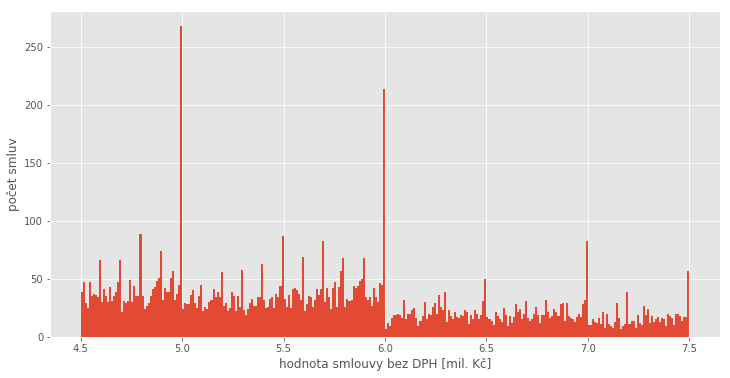

In [15]:
binwidth = 10000

fig, axes = plt.subplots()
axes.set_xlabel("hodnota smlouvy bez DPH [mil. Kč]")
axes.set_ylabel("počet smluv")
axes.get_xaxis().set_major_formatter(formatter)
axes.hist(cena, bins=range(4500001, 7500002, binwidth), rwidth=1)
fig.savefig("vystup/ceny-6.pdf", bbox_inches='tight')

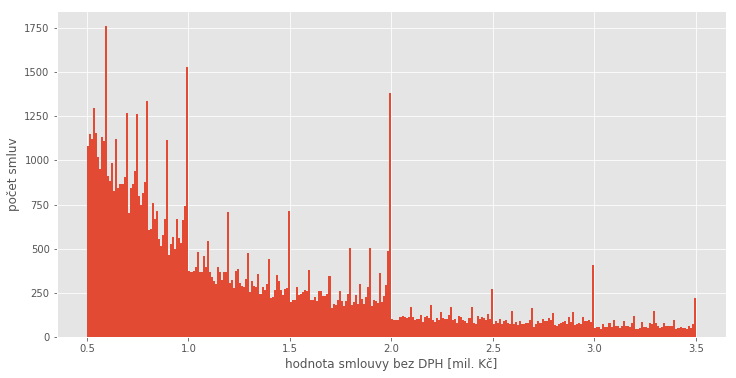

In [16]:
binwidth = 10000

fig, axes = plt.subplots()
axes.set_xlabel("hodnota smlouvy bez DPH [mil. Kč]")
axes.set_ylabel("počet smluv")
axes.get_xaxis().set_major_formatter(formatter)
axes.hist(cena, bins=range(500001, 3500002, binwidth), rwidth=1)
fig.savefig("vystup/ceny-2.pdf", bbox_inches='tight')

In [6]:
data.mean()

s.cena_bez_dph    5.959943e+06
dtype: float64

In [7]:
data.median()

s.cena_bez_dph    127971.296875
dtype: float64

In [8]:
data.loc[(data['s.cena_bez_dph'] <= 50000) & (data['s.cena_bez_dph'] > 0)].count()

s.cena_bez_dph    72515
dtype: int64

In [9]:
f2d = bf.first_digits(cena, digs=2, decimals=2, show_plot=False, inform=False)

c:\users\jan\appdata\local\programs\python\python36\lib\site-packages\benford\benford.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  int)


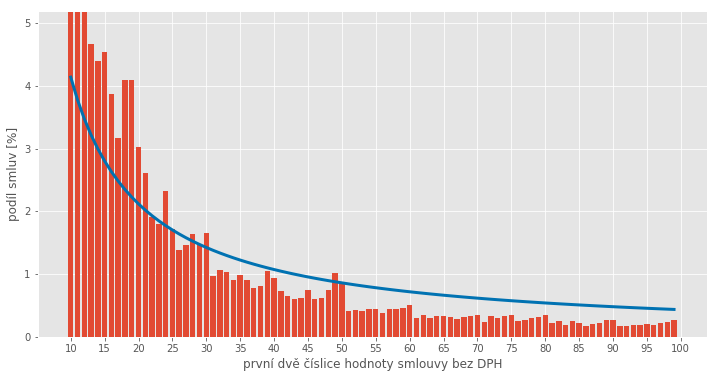

In [17]:
fig, axes = plt.subplots()
axes.set_xlabel("první dvě číslice hodnoty smlouvy bez DPH")
axes.set_ylabel("podíl smluv [%]")
axes.set_ylim([0,5.2])
axes.xaxis.set_ticks(range(10, 101, 5))
axes.bar(f2d.index, f2d['Found']*100)
axes2 = axes.twinx()
axes2.set_ylim([0,5.2])
axes2.set_yticks([])
axes2.plot(f2d.index, f2d['Expected']*100, color='#0072B2', linewidth=3)
fig.savefig("vystup/hodnoty-benford.pdf", bbox_inches='tight')

In [11]:
cena = data["s.cena_bez_dph"].loc[data["s.cena_bez_dph"] >= 100000].dropna().copy(deep=True)

In [12]:
f2d = bf.first_digits(cena, digs=2, decimals=2, show_plot=False, inform=False)

c:\users\jan\appdata\local\programs\python\python36\lib\site-packages\benford\benford.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  int)


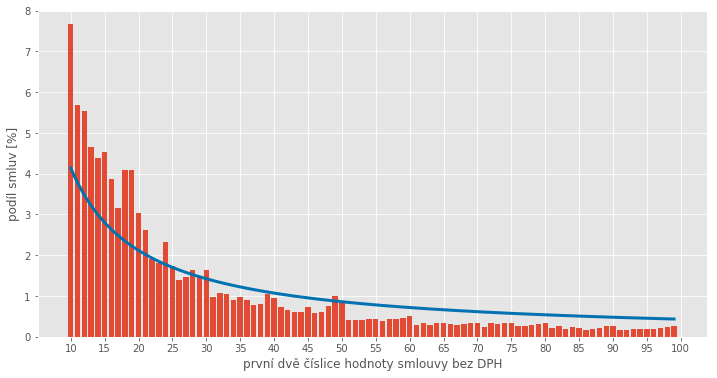

In [18]:
fig, axes = plt.subplots()
axes.set_xlabel("první dvě číslice hodnoty smlouvy bez DPH")
axes.set_ylabel("podíl smluv [%]")
axes.set_ylim([0,8])
axes.xaxis.set_ticks(range(10, 101, 5))
axes.bar(f2d.index, f2d['Found']*100)
axes2 = axes.twinx()
axes2.set_ylim([0,8])
axes2.set_yticks([])
axes2.plot(f2d.index, f2d['Expected']*100, color='#0072B2', linewidth=3)
fig.savefig("vystup/hodnoty-benford-f.pdf", bbox_inches='tight')